<a href="https://colab.research.google.com/github/olgashlyakhtova2000/firstName/blob/main/%D0%9F%D0%BE%D0%BB%D0%B8%D0%BD%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from IPython.display import display, Math
def ch(x):
  if isinstance(x, Polynomial):
      return x
  return Polynomial([x])
class Polynomial:
  def __init__(self, a):
    self.a = [x for x in a]
  def __str__(self):
    s=""
    for k in range(len(self.a)-1, 1, -1):
      if (self.a[k]>1 or self.a[k]<1) and self.a[k]!=0:
        s+=str(self.a[k])+"*x^"+str(k)
      elif self.a[k]==1:
        s+="x^"+str(k)
      if self.a[k-1]>0 and self.a[k]!=0:
          s+="+"
    if self.a[1]!=0 and self.a[1]!=1:
      s+=str(self.a[1])+"*x"
    elif self.a[1]==1:
      s+="x"
    if self.a[0]>0:
      s+="+" + str(self.a[0])
    elif self.a[0]<0:
      s+="-" + str(self.a[0])
    return s
  def __add__(self, x):
    x = ch(x)
    n = min(len(self.a), len(x.a))
    m = max(len(self.a), len(x.a))
    i =0
    Res = Polynomial([0]*m)
    while i<n:
      Res.a[i] = self.a[i]+x.a[i]
      i+=1
    if n==len(self.a)and n!=len(x.a):
      while n<len(x.a):
        Res.a[n] = x.a[n]
        n+=1
    elif n!=len(self.a)and n==len(x.a):
      while n<len(self.a):
        Res.a[n] = self.a[n]
        n+=1
    return Res
  def __sub__(self, x):
    x = ch(x)
    n = min(len(self.a), len(x.a))
    m = max(len(self.a), len(x.a))
    Res = Polynomial([0]*m)
    i =0
    Res = Polynomial([0]*m)
    while i<n:
      Res.a[i] = self.a[i]-x.a[i]
      i+=1
    if n==len(self.a)and n!=len(x.a):
      while n<len(x.a):
        Res.a[n] = -x.a[n]
        n+=1
    elif n!=len(self.a)and n==len(x.a):
      while n<len(self.a):
        Res.a[n] = self.a[n]
        n+=1
    return Res
  def evalf(self, point):
    result = 0
    n = len(self.a)-1
    while n!=0:
      result+=self.a[n]*point**n
      n-=1
    return result+self.a[0]
  def diff(self):
    b=[]
    for k in range(1, len(self.a)):
      b.append(k*self.a[k])
    return Polynomial(b)
  def toLatex(self):
    s=""
    for k in range(len(self.a)-1, 1, -1):
      if (self.a[k]>1 or self.a[k]<1) and self.a[k]!=0:
        s+=str(self.a[k])+"x^"+str(k)
      elif self.a[k]==1:
        s+="x^"+str(k)
      if self.a[k-1]>0 and self.a[k]!=0:
          s+="+"
    if self.a[1]!=0 and self.a[1]!=1:
      s+=str(self.a[1])+"x"
    elif self.a[1]==1:
      s+="x"
    if self.a[0]>0:
      s+="+" + str(self.a[0])
    elif self.a[0]<0:
      s+="-" + str(self.a[0])
    display(Math(s))
  def __mul__(self, x):
    x = ch(x)
    Res = Polynomial([0]*(len(self.a)*len(self.a)-1))
    for var1,i1 in enumerate(self.a):
      for var2,i2 in enumerate(x.a):
        Res.a[var1+var2] += i1*i2
    return Res
  def __pow__(self, y):
    Res = self
    if y<=0: 
      return "Возможно возведение в натуральную степень."
    elif y>1:
      i=1
      while i<y:
        Res = Res * self
        i+=1
    return Res
  def __iadd__(self, other):
    return self+other
  def  __isub__(self, other):
    return self-other
  def  __imul__(self, other):
    return self*other   


In [110]:
P = Polynomial([1,1, 1])
Q = Polynomial([1, 1])
print('P: ', P)
print('Q: ', Q)
print('P+Q=', P+Q)
print('P-Q=', P-Q)
print('P*Q=', P*Q)
print('Q^2=', Q**2)
Q+=P
print('Q+=P',Q)


P:  x^2+x+1
Q:  x+1
P+Q= x^2+2*x+2
P-Q= x^2
P*Q= x^3+2*x^2+2*x+1
Q^2= x^2+2*x+1
Q+=P x^2+2*x+2


In [ ]:
Y = Polynomial([1, 6, 1])
print('Y: ', Y)
print('Result of evalf(1): ', Y.evalf(1))

Y:  x^2+6*x+1
Result of evalf(1):  8


In [ ]:
Z = Polynomial([1, 3, 4, 5])
print ('Z: ', Z, ', Z.diff: ', Z.diff())
Z.toLatex()

Z:  5*x^3+4*x^2+3*x+1 , Z.diff:  15*x^2+8*x+3


<IPython.core.display.Math object>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def plot(pol, a, b):
  n = 500
  dx = (b - a) / n
  X, Y = [], []
  for i in range(n + 1):
    x = a + dx * i
    y = pol.evalf(x)
    X.append(x)
    Y.append(y)

  fig, ax = plt.subplots(figsize=(12, 9))
  ax.plot(X, Y, color="red", lw=5)
  plt.show()

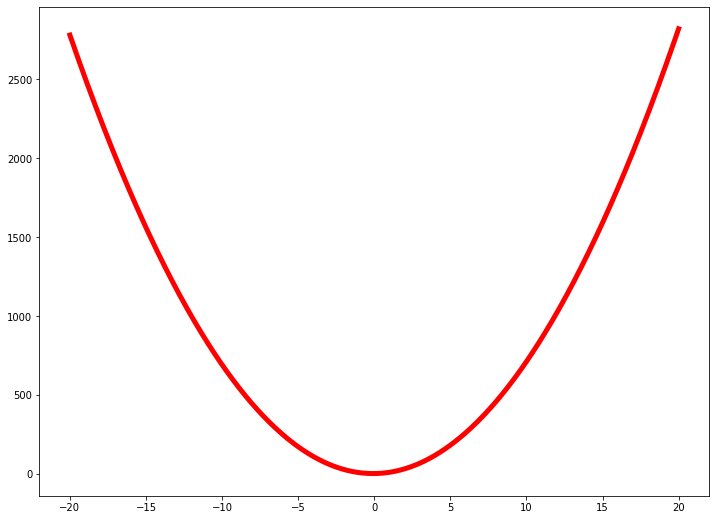

In [ ]:
L = Polynomial([1,1, 7])
plot(L, -20, 20)

In [ ]:
def add(x, y):
  return ['+', x, y]

def mul(x, y):
  return ['*', x, y]

def div(x, y):
  return ["/", x, y]
def sub(x, y):
  return ["-", x, y]

In [ ]:
def check2(x):
  if isinstance(x, Expression):
    return x
  return Expression(x)

class Expression:
  def __init__(self, f):
    self.f = f
  def __add__(self, x):
    x = check2(x)
    return Expression(add(self.f, x.f))
  def __sub__(self, x):
    x = check2(x)
    return Expression(sub(self.f, x.f))
  def __mul__(self, x):
    x = check2(x)
    return Expression(mul(self.f, x.f))
  def __div__(self, x):
    x = check2(x)
    return Expression(div(self.f, x.f))
  def __radd__(self, x):
    x = check2(x)
    return Expression(add(x.f, self.f))
  def __rmul__(self, x):
    x = check2(x)
    return Expression(mul(x.f, self.f))
  def subs(self, var, val):
    return Expression(substitute(self.f, var, val))
  def evalf(self):
    return evaluate(self.f)
  def show(self):
    display(Math(expr2latex(self.f)))

In [ ]:
def expr2latex(x):
  if isinstance(x, (int, float)):
    return str(x)
  if isinstance(x, str):
    return x
  if isinstance(x, Polynomial):
    s=""
    for k in range(len(x.a)-1, 1, -1):
      if (x.a[k]>1 or x.a[k]<1) and x.a[k]!=0:
        s+=str(x.a[k])+"x^"+str(k)
      elif x.a[k]==1:
        s+="x^"+str(k)
      if x.a[k-1]>0 and x.a[k]!=0:
          s+="+"
    if x.a[1]!=0 and x.a[1]!=1:
      s+=str(x.a[1])+"x"
    elif x.a[1]==1:
      s+="x"
    if x.a[0]>0:
      s+="+" + str(x.a[0])
    elif x.a[0]<0:
      s+="-" + str(x.a[0])
    return s
  if isinstance(x, list):
    if x[0] == "+":
      return expr2latex(x[1]) + "+" + expr2latex(x[2])
    if x[0] == "-":
      return expr2latex(x[1]) + "-" + "("+ expr2latex(x[2]) +")"
    if x[0] == "*":
      left = expr2latex(x[1])
      if isinstance(x[1], list) and x[1][0] == "+":
        left = "(" + left + ")"
      right = expr2latex(x[2])
      if isinstance(x[2], list) and x[2][0] == "+":
        right = "(" + right + ")"
      return left + "\\cdot " + right
    if x[0] == "/":
      return "\\dfrac{" + expr2latex(x[1]) + "}{" + expr2latex(x[2]) + "}"
    if x[0] == "sqrt":
      return "\\sqrt{" + expr2latex(x[1]) + "}"

In [ ]:
T1 = Expression( Polynomial([1, 2, 3]))
T2 = Expression(1)
s=T1+T2
s.show()

<IPython.core.display.Math object>